# Data Analysis Homework 2
### Due date: Tuesday, October 22nd 2024, 1 PM

In [3]:
from __future__ import division
from IPython.display import HTML
from IPython.display import display
from scipy.optimize import *
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# please do NOT import any other modules than the ones imported above

## Question 1: Poiseuille's method for determining viscosity

The  volume flow rate, ${\displaystyle\frac{{\rm d}V}{{\rm d}t}}$, of fluid flowing smoothly through a horizontal tube of length $L$ and radius $r$ is given by Poiseuille's equation:
\begin{equation}
\frac{{\rm d}V}{{\rm d}t}=\frac{\pi\rho g h r^4}{8\eta L},
\end{equation}
where $\eta$ and $\rho$ are the viscosity and density, respectively, of the fluid,  $h$ is the head of pressure across the tube, and $g$ the acceleration due to gravity. 
<br>
In an experiment the graph of the flow rate versus height has a slope measured to 7%, the length is known to 0.5%, and the radius to 8%.  
<br>
Required:
<br>

(i) On a piece of paper, sketch the graph of the the flow rate as a function of height, and think about what the slope is equal to. (This question is not marked, it is to help you get started with the problem).
<br>
(ii) What is the fractional precision to which the viscosity is known? 
<br>
(iii) If more experimental time is available, should this be devoted to 
>(a) collecting more flow-rate data
<br>
>(b) measuring the length
<br>
>(c) the radius of the tube?

### (i) On a piece of paper, sketch the graph of the the flow rate as a function of height, and think about what the slope is equal to. (This question is not marked, it is to help you get started with the problem).

### (ii) What is the fractional precision to which the viscosity is known? Express your answer as a DECIMAL. 

In [3]:
def one_i():
    # YOUR CODE HERE
    slope_precision = 0.07
    length_precision = 0.005
    radius_precision = 0.08
    
    viscosity_precision = np.sqrt(slope_precision ** 2 + length_precision ** 2 + (radius_precision * 4) ** 2)
    
    return viscosity_precision

print(one_i())

0.32760494501762333


In [4]:
'''TEST CELL- DO NOT DELETE'''
assert isinstance(one_i(), float) , 'Please make sure that one_i() returns a float.' 
assert one_i()>0., 'Please make sure that one_i() returns a positive value.' 


### (iii) If more experimental time is available, should this be devoted to 
(a) collecting more flow-rate data
<br>
(b) measuring the length
<br>
(c) the radius of the tube?

In [5]:
def one_ii():
    '''Your function should return a string of A,B,C'''
    # YOUR CODE HERE
    # The error in the radius r is 8%, but since r^4 appears in the formula
    # This error is amplified by a factor of 4
    # Its impact on the precision of the viscosity measurement the most significant
    comment = "C"
    return(comment)

print(one_ii())

C


In [6]:
'''TEST CELL- DO NOT DELETE'''
assert one_ii() == 'A' or one_ii() == 'B' or one_ii() == 'C', 'Please return A or B or C in one_ii().' 

## Question 2: Functional error approach for Van der Waals calculation

The Van der Waals equation of state is a correction to the ideal gas law, given by the equation,

\begin{equation}
(P+\frac{a}{V_m^2})(V_m-b) = RT,
\end{equation}

where $P$ is the pressure, $V_m$ is the molar volume, $T$ is the absolute temperature, $R$ is the universal gas constant with $a$ and $b$ being species-specific Van der Waals coefficents. 

A sample of Nitrogen was measured in an experiment as,
<bf>
>Molar Volume $V_m$ = $(2.000 \pm 0.003)$x$10^{-4}m^3mol^{-1}$
<bf>
>Absolute Temperature $T$ = $298.0\pm0.2K$

and the constants are,
<blockquote>
<bf> 
$a$ = $(1.408$x$10^{-1}) m^6mol^{-2}Pa$
<bf>
$b$ = $(3.913$x$10^{-5}) m^3mol^{-1}$
<bf>
$R$ = $(8.3145) JK^{-1}mol^{-1}$
<bf>
</blockquote>
Required:
<bf>
>(i) From the given data, calculate the pressure giving your answer in MPa.
<bf>
>(ii) Calculate the uncertainty in the pressure by using the functional approach for error propagation.
<bf>
>(iii) Repeat the calculations above for 
>>$V_m = (2.000\pm0.003)\times10^{-3}\,{\rm m}^{3}\,{\rm mol}^{-1}$ and  $T=400.0 \pm 0.2K$.

### (i) From the given data, calculate the pressure giving your answer in MPa.

In [7]:
def two_i():
    '''Your function should return the pressure in MPa'''
    V_m = 2.000 * (10 ** (-4))
    T = 298.0
    a = 1.408 * (10 ** (-1))
    b = 3.913 * (10 ** (-5))
    R = 8.3145
    
    P = (R * T / (V_m - b)) - (a / ((V_m) ** 2))
    
    MPa = P  / (10 ** 6)
    
    return MPa
    
print(two_i())

11.882007832411261


In [8]:
'''TEST CELL- DO NOT DELETE'''
assert isinstance(two_i(), float) , 'Please make sure that two_i() returns a float.' 

### (ii) Calculate the uncertainty in the pressure by using the functional approach for error propagation.

In [9]:
def two_ii():
    '''Your function should return the uncertainty'''
    # YOUR CODE HERE
    V_m = 2.000 * (10 ** (-4))
    T = 298.0
    a = 1.408 * (10 ** (-1))
    b = 3.913 * (10 ** (-5))
    R = 8.3145
    
    V_m_precision = 0.003 / 2.000
    T_precision = 0.2 / 298.0
    
    V_m_partial = - (R * T) / ((V_m - b) ** 2) + 2 * (a / V_m ** 3)
    T_partial = R / (V_m - b)
    
    P_precision = np.sqrt(((V_m_partial * V_m_precision) ** 2) + ((T_partial * T_precision) ** 2))
    
    MPa_P = P_precision / (10 ** 6)
    
    return MPa_P
    
print(two_ii())    

90.8129281321437


In [10]:
'''TEST CELL- DO NOT DELETE'''
assert isinstance(two_ii(), float) , 'Please make sure that two_ii() returns a float.' 

### (iii) Repeat the calculations above for 
$V_m = (2.000\pm0.003)\times10^{-3}\,{\rm m}^{3}\,{\rm mol}^{-1}$ and  $T=400.0 \pm 0.2K$.

In [11]:
def two_iii():
    '''Your function should return both the pressure and the uncertainty'''
    pressure_2 = 0
    uncertainty_2 = 0
    # YOUR CODE HERE
    V_m = 2.000 * (10 ** (-4))
    T = 400.0
    a = 1.408 * (10 ** (-1))
    b = 3.913 * (10 ** (-5))
    R = 8.3145
    
    P = (R * T / (V_m - b)) - (a / ((V_m) ** 2))
    
    pressure_2 = P  / (10 ** 6)
    
    V_m_precision = 0.003 / 2.000
    T_precision = 0.2 / 400.0
    
    V_m_partial = - (R * T) / (V_m - b) ** 2 + 2 * a / V_m ** 3
    T_partial = R / (V_m - b)
    
    P_precision = np.sqrt((V_m_partial * V_m_precision) ** 2 + (T_partial * T_precision) ** 2)
    
    uncertainty_2 = P_precision / (10 ** 6)
    
    return(pressure_2,uncertainty_2)

print(two_iii())

(17.15383601665941, 139.9690310498508)


In [12]:
'''TEST CELL- DO NOT DELETE'''
test_case = two_iii()
assert isinstance(test_case[0], float) , 'Please make sure that two_iii() returns two floats.'
assert isinstance(test_case[1], float) , 'Please make sure that two_iii() returns two floats.'

In [13]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

## Question 3: Reverse Engineering the Incredible Goal
The separation of the posts is 7.32m, and the ball is struck from a point 22m from the near post and 29m from the far post.

Required:
<br>
(i) Plot a graph of $\alpha_\theta$ on the y-axis vs $\alpha_L$ on the x-axis for the range of values presented in the alpha_ls array.
<br>
(ii) To what (common) precision must these three lengths be known to justify quoting the angle to 11 significant figures? 

*[Hint: use the functional approach using the values for the errors in the length measurements as the provided alpha__ls array]*

### (i) Plot a graph of $\alpha_\theta$ on the y-axis vs $\alpha_L$ on the x-axis for the range of values presented in the alpha_ls array.

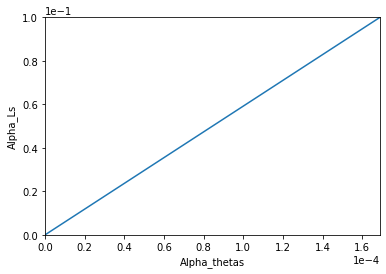

[0.00016885860813890957,
 1.6885860813890958e-05,
 1.6885860813890956e-06,
 1.688586081389096e-07,
 1.6885860813890958e-08,
 1.6885860813890957e-09,
 1.6885860813890955e-10,
 1.6885860813890955e-11,
 1.6885860813890961e-12,
 1.6885860813890957e-13,
 1.6885860813890956e-14,
 1.6885860813890955e-15]

In [14]:
def three_i():
    a = 22
    b = 29
    c = 7.32
    alpha_ls = [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12]
    alpha_thetas = []
    '''Your function should plot the graph and return the alpha_thetas array.'''
    # c^2 = a^2 + b^2 - 2ab*cos(thetas)
    # thetas = arccos((a^2 + b^2 - c^2)/2ab)
    cos_theta= (a ** 2 + b ** 2 - c ** 2) / (2 * a * b)
    theta = np.arccos(cos_theta)
    a_precisions = [alpha_l / a for alpha_l in alpha_ls]
    b_precisions = [alpha_l / b for alpha_l in alpha_ls]
    c_precisions = [alpha_l / c for alpha_l in alpha_ls]
    sqrt_term = np.sqrt(1 - ((a**2 + b**2 - c**2)/(2*a*b))**2)
    a_partial = - 1 / sqrt_term * ((2*a) / (2*a*b) + (a**2 + b**2 - c**2) / (- 2 * (a**2) * b))
    b_partial = - 1 / sqrt_term * ((2*b) / (2*a*b) + (a**2 + b**2 - c**2) / (- 2 * (b**2) * a))
    c_partial = - 1 / sqrt_term * ((- 2 * c) / (2 * a * b))
    
    alpha_thetas = [theta * np.sqrt((a_precisions[i] * a_partial) ** 2 + (b_precisions[i] * b_partial) ** 2 + (c_precisions[i] * c_partial) ** 2) for i in range(len(alpha_ls))]
    
    plt.plot(alpha_thetas, alpha_ls)
    plt.xlabel("Alpha_thetas")
    plt.ylabel("Alpha_Ls")
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xlim(min(alpha_thetas), max(alpha_thetas))
    plt.ylim(min(alpha_ls), max(alpha_ls))
    plt.show()
    
    return(alpha_thetas)

three_i()

In [15]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

### (ii) To what (common) precision must these three lengths be known to justify quoting the angle to 11 significant figures?

To ensure that the angle 𝜃 can be quoted to 11 significant figures, When $\alpha_L = 10^{-8}$, we get $\alpha_\theta \approx 1.689 \times 10^{-11}$.  
When the precision of the lengths is $10^{-8}$, the precision of the angle $\alpha_\theta$ reaches 11 significant figures.

## Question 4: Linear Regression/Weighted Fit

The data  plotted in Fig 6.1(d) relating to the degradation of the signal to noise ratio from a frequency to voltage converter near harmonics of the mains frequency are listed below.
\begin{equation}
\begin{array}{lcccccc}
\hline
{\rm frequency~(Hz)} &10&20&30&40&50&60\\
{\rm voltage~(mV)} &16&45&64&75&70&115\\
{\rm error~(mV)}   &5&5&5&5&30&5\\
\hline
{\rm frequency~(Hz)} &70&80&90&100&110&\\
{\rm voltage~(mV)} &142&167&183&160&221&\\
{\rm error~(mV)}   &5&5&5&30&5&\\
\hline
\end{array} 
\end{equation}

This data is also contained in the file 'linear_regression.csv'.

Required: 
<br>
(i) Calculate the best-fit gradient and intercept and associated errors using a weighted fit. You may use the curve_fit function.

In [5]:
data = pd.read_csv('linear_regression.csv')
frequencies = data.iloc[:,0]
voltages = data.iloc[:,1]
voltage_errors = data.iloc[:,2]

def f(frequencies, a, b):
    return a * frequencies + b

def best_fit_params():
    '''Your function should return the gradient,gradient_error,intercept,intercept_error'''
    gradient = 0
    gradient_error = 0
    intercept = 0
    intercept_error = 0
    # YOUR CODE HERE
    popt, pcov = curve_fit(f, frequencies, voltages, sigma = voltage_errors)
    
    gradient, intercept = popt
    gradient_error  = np.sqrt(pcov[0, 0])
    intercept_error = np.sqrt(pcov[1, 1])
    
    return(gradient,gradient_error,intercept,intercept_error)

best_fit_params()

(2.0284648194758716,
 0.05231193382948591,
 -0.9474963040606827,
 3.4085972274383725)

In [6]:
'''TEST CELL- DO NOT DELETE'''
assert isinstance(best_fit_params(), (list, tuple, np.ndarray)), \
    'Please make sure that best_fit_params() returns a list/array of floats.'


In [7]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [8]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

In [9]:
'''TEST CELL- DO NOT DELETE'''

'TEST CELL- DO NOT DELETE'

## Question 5: Error bars from a $\chi^2$ minimisation
|--|Unweighted | Weighted |
| --- | --- | --- |
| Gradient | (1.9$\pm$0.2)mV/Hz | (2.03$\pm$0.05)mV/Hz |
| Intercept | (0$\pm$1)x10mV | (-1$\pm$3)mV |

Required:
<br>
(i) For the data set of the previous question, write your own code to perform a $\chi^2$ minimisation. You may use the mininmize function, but not the curve_fit function.
<br>
(ii) Verify that $\chi^{2}_{\rm{min}}$ is obtained for the same values of the parameters as are listed in the table above. 
<br>
(iii) By following the procedure of $\chi^2\rightarrow\chi^2_{\rm min}+1$ outlined in Section 6.5 in Hughes and Hase and the figure above, check that the error bars for $m$ and $c$ are in agreement with the table above.  Include explicitly the first 5 steps of the procedure shown in the figure above for the calculation of the slope.


### (i) For the data set of the previous question, write code to perform a $\chi^2$ minimisation.

In [10]:
def cost_fun_weighted(params, *args):
    frequencies, voltages, voltage_errors = args
    a, b = params
    f = a * frequencies + b
    X2 = np.sum(((voltages - f) / voltage_errors) ** 2)
    return X2

def cost_fun_unweighted(params, *args):
    frequencies, voltages = args
    a, b = params
    f = a * frequencies + b
    X2 = np.sum((voltages - f) ** 2)
    return X2

def bf_params(cost_fun, args):
    params_init = [0, 0]
    result = minimize(cost_fun, params_init, args=args)
    
    gradient, intercept = result.x

    X2_min = cost_fun(result.x, *args)
    
    return gradient, intercept, X2_min

print(bf_params(cost_fun_weighted,   (frequencies, voltages, voltage_errors)))
print(bf_params(cost_fun_unweighted, (frequencies, voltages)))

(2.028464767335051, -0.947492954467219, 9.11590358805417)
(1.9072726689479502, -0.0727233890872136, 2225.9636363636764)


### (ii) Verify that $\chi^{2}_{\rm{min}}$ is obtained for the same values of the parameters as are listed in the table above. 

In [39]:
data = pd.read_csv('linear_regression.csv')

def five_ii(): 
    '''Your function must return the gradient and intercept'''
    gradient = 0
    intercept = 0
    # YOUR CODE HERE
    gradient, intercept, _ = bf_params(cost_fun_unweighted, (frequencies, voltages))
    weighted_gradient, weighted_intercept, _ = bf_params(cost_fun_weighted, (frequencies, voltages, voltage_errors))
    
    print(f"Unweighted Fit: Gradient = {round(gradient, 2)}, Intercept = {round(intercept,2)}")
    print(f"Weighted Fit: Gradient = {round(weighted_gradient, 2)}, Intercept = {round(weighted_intercept, 2)}")
    
    return(gradient,intercept)

In [40]:
'''TEST CELL- DO NOT DELETE'''
assert isinstance(five_ii(), (list, tuple, np.ndarray)), \
    'Please make sure that five_ii() returns a list/array of two floats.'

Unweighted Fit: Gradient = 1.91, Intercept = -0.07
Weighted Fit: Gradient = 2.03, Intercept = -0.95


### (iii) By following the procedure of $\chi^2\rightarrow\chi^2_{\rm min}+1$ outlined in Section 6.5 in Hughes and Hase and the figure above, check that the error bars for $m$ and $c$ are in agreement with the table above.  Include explicitly the first 5 steps of the procedure shown in the figure above for the calculation of the slope.

In [43]:
def five_iii():
    error_m = 0
    error_c = 0
    # YOUR CODE HERE
    N = len(frequencies)
    
    sum_x = np.sum(frequencies)
    sum_y = np.sum(voltages)
    sum_x2 = np.sum(frequencies ** 2)
    sum_xy = np.sum(frequencies * voltages)
    
    Delta = N * sum_x2 - sum_x ** 2
    
    m = (N * sum_xy - sum_x * sum_y) / Delta
    c = (sum_x2 * sum_y - sum_x * sum_xy) / Delta
    
    y_fit = m * frequencies + c
    
    alpha_CU = np.sqrt(np.sum((voltages - y_fit) ** 2) / (N - 2))
    
    alpha_m = alpha_CU * np.sqrt(N / Delta)
    alpha_c = alpha_CU * np.sqrt(sum_x2 / Delta)
    
    return(alpha_m,alpha_c)

In [44]:
'''TEST CELL- DO NOT DELETE'''
assert isinstance(five_iii(), (list, tuple, np.ndarray)), \
    'Please make sure that five_ii() returns a list/array of two floats.'

## Question 6- Strategies for error bars

\begin{equation}
\begin{array}{lccccc}
\hline
x &1&2&3&4&5\\
y &51&103&150&199&251\\
\alpha_{y}   &1&1&2&2&3\\
\hline
x &6&7&8&9&10\\
y &303&347&398&452&512\\
\alpha_{y}   &3&4&5&6&7\\
\hline
\end{array} 
\end{equation}

Required:
<br>
(i) Calculate the weighted best-fit values of the slope, intercept, and their uncertainties.
<br>
(ii) If the data set had been homoscedastic, with all the errors equal, $\alpha_{y}=4$, calculate the weighted best-fit values of the slope, intercept, and their uncertainties.
<br>
(iii) If the experimenter took greater time to collect the first and last data points, for which $\alpha_{y}=1$, at the expense of all of the other data points, for which $\alpha_{y}=8$, calculate the weighted best-fit values of the slope, intercept, and their uncertainties.
<br>
(iv) Comment on your results.
<br>
(v) Plot the original data from the table including error bars. On the same plot, show the fitted function calculated in (i).

### (i) Calculate the weighted best-fit values of the slope, intercept, and their uncertainties.

In [52]:
xs = [1,2,3,4,5,6,7,8,9,10]
ys = [51,103,150,199,251,303,347,398,452,512]

def f(x,a,b):
    return(a*x+b)

def six_i():
    errors = [1,1,2,2,3,3,4,5,6,7]
    slope = 0
    intercept = 0
    slope_uncertainty = 0
    intercept_uncertainty = 0
    # YOUR CODE HERE
    popt, pcov = curve_fit(f, xs, ys, sigma = errors)
    
    slope, intercept = popt
    slope_uncertainty  = np.sqrt(pcov[0, 0])
    intercept_uncertainty = np.sqrt(pcov[1, 1])
    
    return(slope,intercept,slope_uncertainty,intercept_uncertainty)

six_i()

(49.89790138742879, 1.726770709105078, 0.332201663924493, 1.0360068862703642)

In [53]:
'''TEST CELL- DO NOT DELETE'''
assert isinstance(six_i(), (list, tuple, np.ndarray)), \
    'Please make sure that six_i() returns a list/array of four floats.'

### (ii) If the data set had been homoscedastic, with all the errors equal, $\alpha_{y}=4$, calculate the weighted best-fit values of the slope, intercept, and their uncertainties.

In [54]:
def six_ii():
    errors = [4,4,4,4,4,4,4,4,4,4]
    slope = 0
    intercept = 0
    slope_uncertainty = 0
    intercept_uncertainty = 0
    # YOUR CODE HERE
    popt, pcov = curve_fit(f, xs, ys, sigma = errors)
    
    slope, intercept = popt
    slope_uncertainty  = np.sqrt(pcov[0, 0])
    intercept_uncertainty = np.sqrt(pcov[1, 1])
    
    return(slope,intercept,slope_uncertainty,intercept_uncertainty)

six_ii()

(50.47272726877133,
 -0.9999999782423065,
 0.45720434535997834,
 2.836878357799031)

In [55]:
'''TEST CELL- DO NOT DELETE'''
assert isinstance(six_ii(), (list, tuple, np.ndarray)), \
    'Please make sure that six_ii() returns a list/array of four floats.'

### (iii) If the experimenter took greater time to collect the first and last data points, for which $\alpha_{y}=1$, at the expense of all of the other data points, for which $\alpha_{y}=8$, calculate the weighted best-fit values of the slope, intercept, and their uncertainties.

In [56]:
def six_iii():
    errors = [1,8,8,8,8,8,8,8,8,1]
    slope = 0
    intercept = 0
    slope_uncertainty = 0
    intercept_uncertainty = 0
    # YOUR CODE HERE
    popt, pcov = curve_fit(f, xs, ys, sigma = errors)
    
    slope, intercept = popt
    slope_uncertainty  = np.sqrt(pcov[0, 0])
    intercept_uncertainty = np.sqrt(pcov[1, 1])
    
    return(slope,intercept,slope_uncertainty,intercept_uncertainty)

six_iii()

(51.198747152729084,
 -0.45340345705795704,
 0.13868714281431524,
 0.9769093572145309)

In [57]:
'''TEST CELL- DO NOT DELETE'''
assert isinstance(six_iii(), (list, tuple, np.ndarray)), \
    'Please make sure that six_iii() returns a list/array of four floats.'

### (iv) Comment on your results.

For Original Errors:
The slope is relatively small, which means a good confidence in the slope estimation.
The intercept has a larger uncertainty, but it is still a reasonable result.

For Homoscedastic Errors:
All the data points are given the same error, which results more balanced in weighting across the data points.
The uncertainty of slope changes slightly.
The uncertainty of intercept changes significantly.

For collecting the first and last data points for greater time:
The uncertainty of slope and intercept is small which means the good-fit is more stable.

### (v) Plot the original data from the table including error bars. On the same plot, show the fitted function calculated in (i).

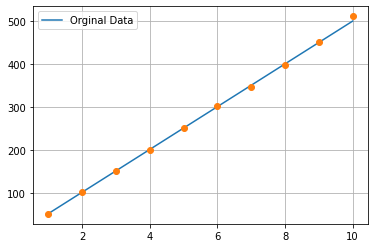

In [64]:
slope_i, intercept_i ,_,_ = six_i()
x_fit = np.linspace(min(xs), max(xs), 100)
y_fit_i = f(x_fit, slope_i, intercept_i)
plt.plot(x_fit, y_fit_i, label = "Orginal Data")
plt.plot(xs,ys, 'o')
plt.legend()
plt.grid(True)

plt.show()